In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from celluloid import Camera

In [6]:
# Inisialisasi parameter

g=9.8
m=60
k=5
deltat=0.1
t = np.arange(0,50,deltat)
damping= 5
RestLength = 5
elasticity = 0.9

#Bola 1
x1init=0
y1init=100
y1 = np.zeros(len(t))
x1 = np.zeros(len(t))
vx1 = np.zeros(len(t))
vy1 = np.zeros(len(t))
FSpringy1 = np.zeros(len(t))
FDampingy1 = np.zeros(len(t))
FTotaly1 = np.zeros(len(t))
FSpringx1 = np.zeros(len(t))
FDampingx1 = np.zeros(len(t))
FTotalx1 = np.zeros(len(t))
y1[0] = y1init
x1[0] = x1init

#Bola 2
x2init=100
y2init=100
y2 = np.zeros(len(t))
x2 = np.zeros(len(t))
vx2 = np.zeros(len(t))
vy2 = np.zeros(len(t))
FSpringy2 = np.zeros(len(t))
FDampingy2 = np.zeros(len(t))
FTotaly2 = np.zeros(len(t))
FSpringx2 = np.zeros(len(t))
FDampingx2 = np.zeros(len(t))
FTotalx2 = np.zeros(len(t))
y2[0] = y2init
x2[0] = x2init


In [7]:
yover1 = np.zeros(len(t))
yover2 = np.zeros(len(t))

for n in range(0,len(t)-1):
    SpringLength = np.sqrt((y1[n]-y2[n])**2+(x1[n]-x2[n])**2)
    SpringDisplacement = SpringLength-RestLength
    sin = (y2[n]-y1[n])/SpringLength
    cos = (x2[n]-x1[n])/SpringLength

    #Bola 1

    FSpringy1[n]=k*SpringDisplacement*sin
    FDampingy1[n]= damping*vy1[n]

    FSpringx1[n]=k*SpringDisplacement*cos
    FDampingx1[n]= damping*vx1[n]

    #Bola 2

    FSpringy2[n]=k*SpringDisplacement*sin
    FDampingy2[n]= damping*vy2[n]

    FSpringx2[n]=k*SpringDisplacement*cos
    FDampingx2[n]= damping*vx2[n]

    #gaya total bola 1 dan 2
    #bola 1
    FTotaly1[n]=FSpringy1[n]-m*g - FDampingy1[n] 
    FTotalx1[n]=FSpringx1[n] - FDampingx1[n] 
    #bola2
    FTotaly2[n]=-FSpringy2[n]-m*g - FDampingy2[n]
    FTotalx2[n]=-FSpringx2[n] - FDampingx2[n]

    #Metode Euler 
    #Penerapan rule untuk mendapat posisi dan kecepatan baru
    
    #bola 1
    if (y1[n] + vy1[n+1]*(t[n+1] - t[n])) > 0:
        vy1[n+1] = vy1[n] + FTotaly1[n]/m*(t[n+1] - t[n])
        y1[n+1] = y1[n] + vy1[n+1]*(t[n+1] - t[n])
        vx1[n+1] = vx1[n] + FTotalx1[n]/m*(t[n+1] - t[n])
        x1[n+1] = x1[n] + vx1[n+1]*(t[n+1] - t[n])
    elif (vy1[n] + FTotaly1[n]/m*(t[n+1] - t[n])) > 0:
        vy1[n+1] = vy1[n] + FTotaly1[n]/m*(t[n+1] - t[n])
        y1[n+1] = y1[n] + vy1[n+1]*(t[n+1] - t[n])
        vx1[n+1] = vx1[n] + FTotalx1[n]/m*(t[n+1] - t[n])
        x1[n+1] = x1[n] + vx1[n+1]*(t[n+1] - t[n])
    else:
        vy1[n+1] = -elasticity*(vy1[n] + FTotaly1[n]/m*(t[n+1] - t[n]))
        y1[n+1]= -(y1[n] + vy1[n+1]*(t[n+1] - t[n]))
        vx1[n+1] = (vx1[n] + FTotalx1[n]/m*(t[n+1] - t[n]))
        x1[n+1] = x1[n] + vx1[n+1]*(t[n+1] - t[n])
    
    #bola 2
    if (y2[n] + vy2[n+1]*(t[n+1] - t[n])) > 0:
        vy2[n+1] = vy2[n] + FTotaly2[n]/m*(t[n+1] - t[n])
        y2[n+1] = y2[n] + vy2[n+1]*(t[n+1] - t[n])
        vx2[n+1] = vx2[n] + FTotalx2[n]/m*(t[n+1] - t[n])
        x2[n+1] = x2[n] + vx2[n+1]*(t[n+1] - t[n])
    elif (vy2[n] + FTotaly2[n]/m*(t[n+1] - t[n])) > 0:
        vy2[n+1] = vy2[n] + FTotaly2[n]/m*(t[n+1] - t[n])
        y2[n+1] = y2[n] + vy2[n+1]*(t[n+1] - t[n])
        vx2[n+1] = vx2[n] + FTotalx2[n]/m*(t[n+1] - t[n])
        x2[n+1] = x2[n] + vx2[n+1]*(t[n+1] - t[n])
    else:
        vy2[n+1] = -elasticity*(vy2[n] + FTotaly2[n]/m*(t[n+1] - t[n]))  
        y2[n+1] = -(y2[n] + vy2[n+1]*(t[n+1] - t[n]))
        vx2[n+1] = (vx2[n] + FTotalx2[n]/m*(t[n+1] - t[n]))
        x2[n+1] = x2[n] + vx2[n+1]*(t[n+1] - t[n])
    

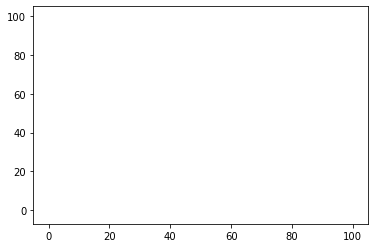

In [14]:
fig = plt.figure()
camera = Camera(fig)
previoussecs = int(5/deltat)
for i in range(0,len(t)):
    plt.plot(x1[i],y1[i], 'o',color='green',linewidth=100,markersize = 15)
    plt.plot(x2[i],y2[i], 'o',color='blue',linewidth=10,markersize = 15)
    if np.sqrt((x1[i]-x2[i])**2+(y1[i]-y2[i])**2) < RestLength:
       plt.plot([x2[i],x1[i]],[y2[i],y1[i]], color='red')
    else:
        plt.plot([x2[i],x1[i]],[y2[i],y1[i]], ':', color='black')
        
    camera.snap()
animation = camera.animate()
animation.save('Simulasi1.mp4', writer='ffmpeg',fps=60,dpi=300)

Text(0.5, 1.0, 'Posisi bola terhadap waktu')

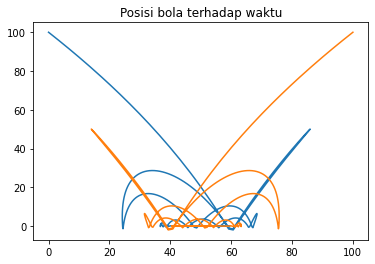

In [13]:
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.title('Posisi bola terhadap waktu')